# DEMO: Advanced Application Using *Bayesian Optimization* package
Here we used function f(x,y) = x^2 - y^2 to test whether our Bayesian Optimization method really works.  

>Input: Number of iterations.


>Output: Current global optimized result after each iteration.

    All rights reserved by SYSU-Software Yongye Su
    For iGEM-2020

In [1]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter


In [2]:
def function_example(x,y):
    return x**2-y**2

In [3]:
optimizer = BayesianOptimization(
    f=function_example,
    pbounds={'x': (-5, 5), 'y': (-5, 5)},
    verbose=2,
    random_state=1,
)

Initially, x = 0, y = 0, z = 0^2 - 0^2 = 0

In [4]:
from bayes_opt import UtilityFunction

utility = UtilityFunction(kind="ei", kappa=2.5, xi=0.0)

In [5]:
next_point_to_probe = optimizer.suggest(utility)
print("Next point to probe is:", next_point_to_probe)
# next_point_to_probe['x']

Next point to probe is: {'x': -0.8297799529742598, 'y': 2.2032449344215808}


In [6]:
# target = float(input("With given value, what result did you get?"))
target = function_example(next_point_to_probe['x'],next_point_to_probe['y'])

print("Found the target value to be:", target)

Found the target value to be: -4.165753470696391


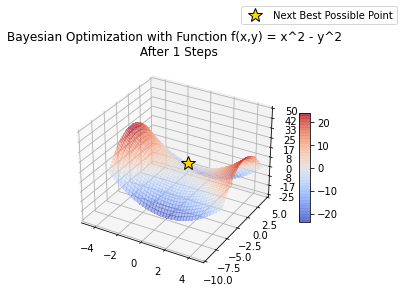

In [7]:
def visulized(x,y,z,iter_count):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    fig.suptitle(
        'Bayesian Optimization with Function f(x,y) = x^2 - y^2 \n After {} Steps'.format(iter_count+1),
        fontdict={'size':30}
    )
    # Make data.
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z =(X**2 - Y**2)


    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False,alpha=0.4,zorder = 1)
    ax.plot3D(x,y,z,'*', markersize=15, 
                 label=u'Next Best Possible Point', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1,zorder=4)
    # Customize the z axis.
    ax.set_xlim(-5,5)
    ax.set_ylim(-10,5)
    ax.set_zlim(-25, 50)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.00f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=10)
    fig.legend(loc=4, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    
    
    
    #-------SAVE IMAGE HERE, CHOOSE A PATH YOU LIKE--------#
    
    path = '/home/igem-bo/' +str(iter_count) +'.png'
    
    #-------SAVE IMAGE HERE, CHOOSE A PATH YOU LIKE--------#

    plt.savefig(path)
    
visulized(next_point_to_probe['x'],next_point_to_probe['y'],target,0)

## Opimize Register
Since we need a lot steps of iteration, a register is useful in the process.  
Don't worry, you even don't need to check it out. Enjoy it!

In [8]:
optimizer.register(
    params=next_point_to_probe,
    target=target,
)

## So far: How many experiments are you willing to spend to get a relatively optimal solution ?
Type the number of iterations here!  


**In fact every experiment is an iteration*

In [9]:
iter_num = int(input("Your experiment time: "))

Your experiment time:  15


These are your parameters, {'x': 4.891402961407735, 'y': -4.86469491894781}  current best result pair is: 
0.26056627643171737 {'x': 4.891402961407735, 'y': -4.86469491894781}
These are your parameters, {'x': 3.300019078873172, 'y': 1.601379171587518}  current best result pair is: 
8.325710669732612 {'x': 3.300019078873172, 'y': 1.601379171587518}
These are your parameters, {'x': -3.5069328682627043, 'y': 1.2881176400276262}  current best result pair is: 
10.639331087950938 {'x': -3.5069328682627043, 'y': 1.2881176400276262}
These are your parameters, {'x': -4.139279019688967, 'y': 2.5869133756256506}  current best result pair is: 
10.441509989846358 {'x': -4.139279019688967, 'y': 2.5869133756256506}
These are your parameters, {'x': -3.7568953304901207, 'y': 1.7113707973214565}  current best result pair is: 
11.185472518333796 {'x': -3.7568953304901207, 'y': 1.7113707973214565}
These are your parameters, {'x': -4.027932263722298, 'y': 1.833251467436189}  current best result pair is: 
1

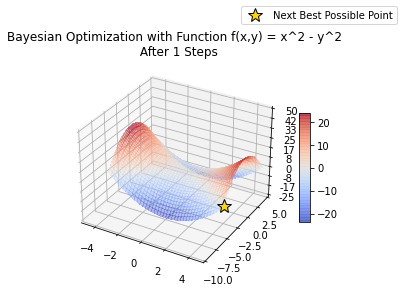

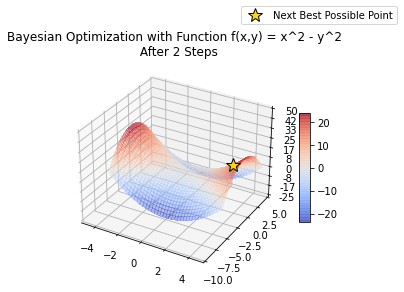

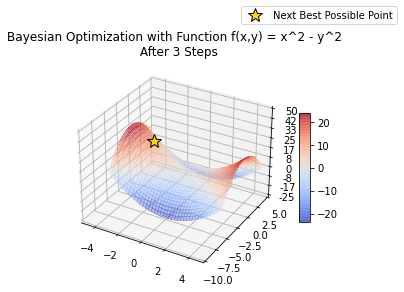

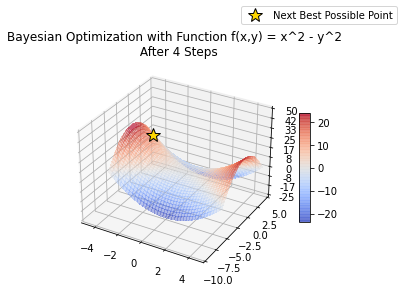

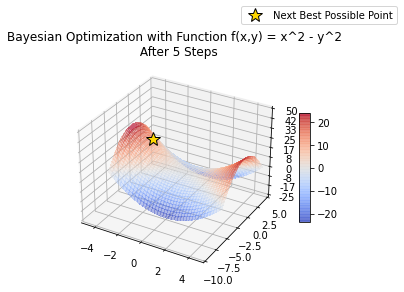

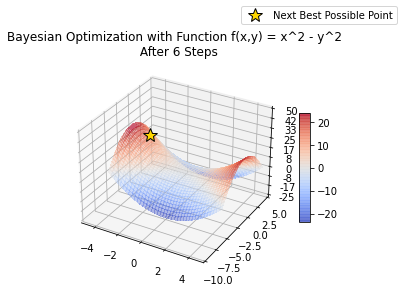

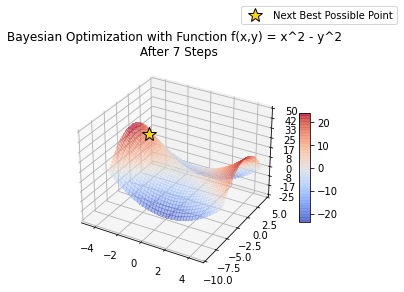

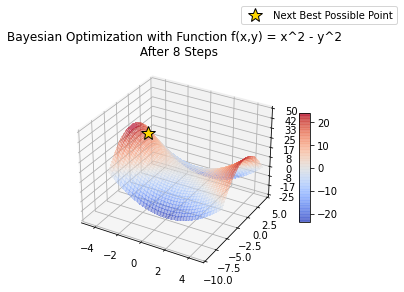

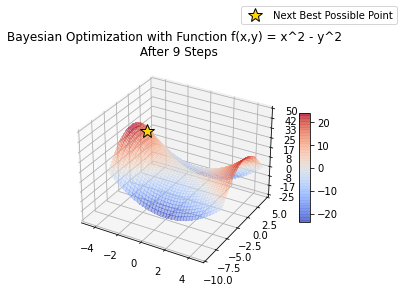

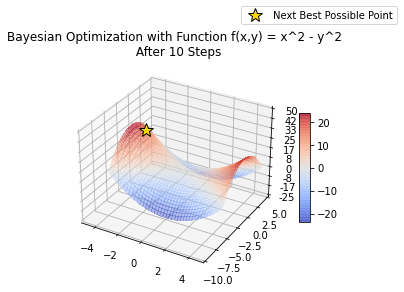

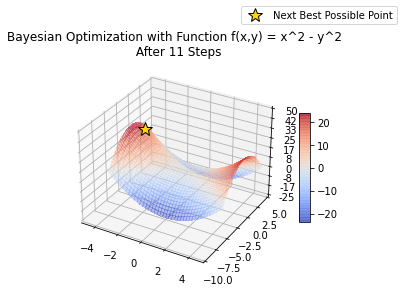

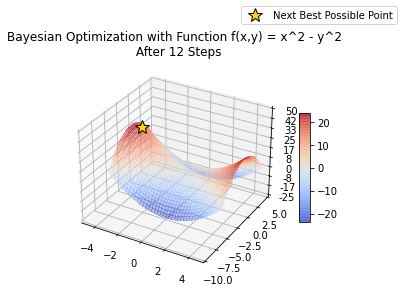

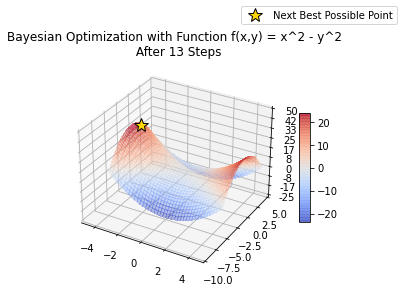

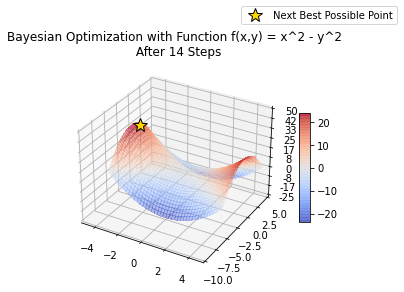

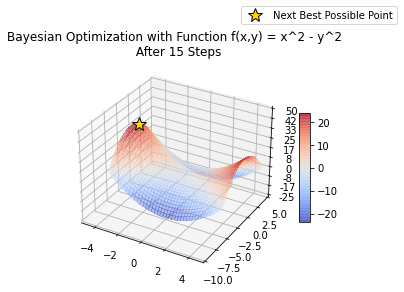

In [10]:
for i in range(iter_num):
    next_point = optimizer.suggest(utility)
    print("These are your parameters,",next_point," current best result pair is: ")
    R = next_point['x']**2-next_point['y']**2
    target = float(R)
    optimizer.register(params=next_point, target=target)
    print(target, next_point)
    visulized(next_point['x'],next_point['y'],target,i)
#tmp = round(optimizer.max['x'])
#optimizer.max['x'] = tmp
print(optimizer.max)